### MAE(Mean Absolute Error)
Σ(yi-y_predi)/n
### MSE(Mean Square Error)
Σ(yi-y_predi)^2/n
### RMSE(Root Mean Square Error)
(Σ(yi-y_predi)^2/n)^(1/2)

### R^2 (R Square) : 결정계수 (데이터의 분산을 기반으로 한 평가 지표)
R^2 = 1-(SSE)/(SST) = (SSR)/(SST) <br>
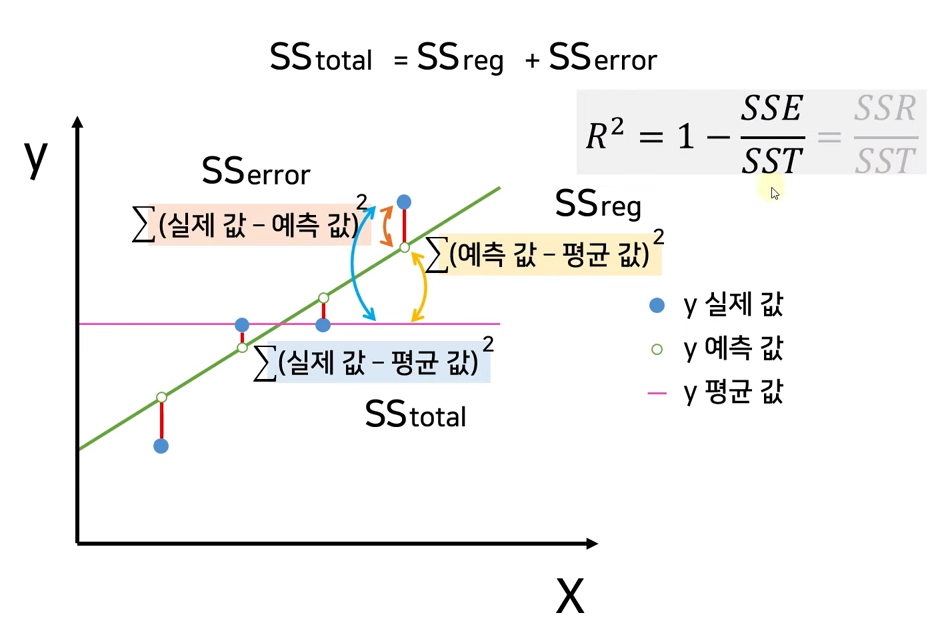
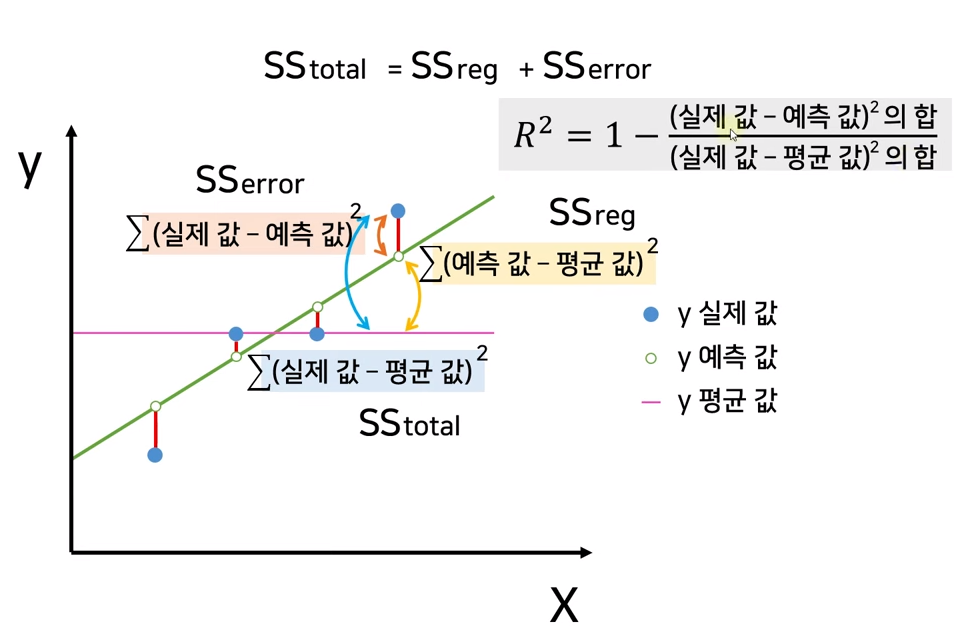

--> 1에 가까울수록 좋고, 0에 가까울수록 나쁘다

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('study\\MultipleLinearRegressionData.csv')

#독립변수
X = dataset.iloc[:,:-1].values # row는 전부, column은 마지막꺼 하나빼고 다
#종속변수
y = dataset.iloc[:,-1].values # row는 전부, column은 마지막꺼 하나만

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'),[2])], remainder='passthrough')
# transformers(어떤 변경을 가할지,OneHotEncoder(drop='first')--> 첫번째 칼럼 드럽,[2]-->2번 칼럼에 적용, remainder='passthrough' --> 나머지 그냥 둔다)
X= ct.fit_transform(X)
X
# 1 0 : HOME
# 0 1 : Library
# 0 0 : Cafe
from sklearn.model_selection import train_test_split
# 4개 값 출력
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
#testset를 20퍼센트, random_state -> seed 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

### 다양한 평가 지표(회귀모델)
1. MAE (Mean Absolute Error) : (실제 값과 예측 값) 차이의 절대값
1. MSE (Mean Squared Error) : 차이의 제곱
1. RMSE (Root Mean Squared Error) : 차이의 제곱에 루트
1. R2 : 결정 계수

> R2는 1에 가까울수록, 나머지는 0에 가까울수록 좋음

In [4]:
#MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3.2253285188287943

In [5]:
#MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

19.900226981514848

In [6]:
#RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred, squared=False)

4.460967045553559

In [7]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9859956178877447

In [8]:
reg.score(X_test, y_test)

0.9859956178877447